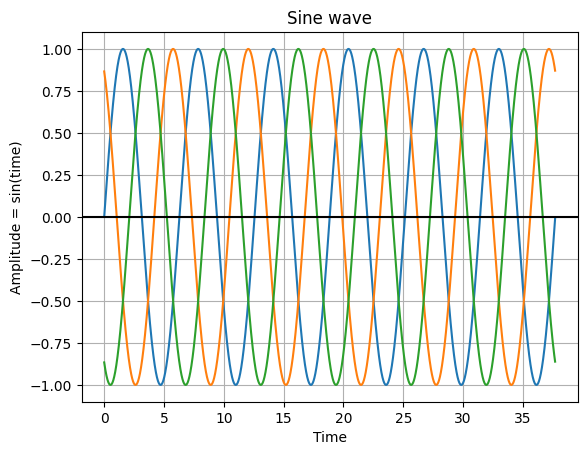

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
t   = np.arange(0, 12*m.pi, 0.01);
# Amplitude of the sine wave is one 1
u_l1   = np.sin(t)

u_l2   = np.sin(t+2*m.pi/3) 
u_l3   = np.sin(t+4*m.pi/3)
# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(t, u_l1,t,u_l2,t,u_l3)
# Give a title for the sine wave plot
plt.title('Sine wave')
# Give x axis label for the sine wave plot

plt.xlabel('Time')

# Give y axis label for the sine wave plot

plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()
# Display the sine wave

plt.show()

0.8508480103472356 0.33610500132770477 0.14970074987119675 -0.08110463408267286
V_l1_min  = -1.389370792051907  V_l1 max  = 1.389370792051907
Valpha_min= -0.9167183002179473  Valpha max= 0.9167183042129613
Vbeta_min = -1.0329028615858753  Vbeta max = 1.0329029323133436


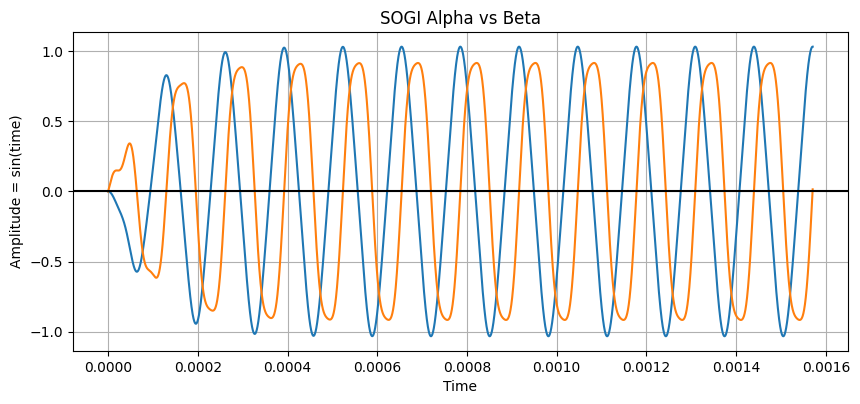

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

class SOGI():
  def __init__(self):
    self.output1minus1= 0
    self.input1minus1 = 0
    self.input1minus2 = 0
    self.input1minus3 = 0
    self.output2minus1= 0
    self.input2minus1 = 0
    self.input2minus2 = 0
    self.input2minus3 = 0
    self.vector_internal_alpha = 0
    self.vector_internal_beta  = 0
    self.k = 0.5

  def integ1(self,inp):
    output1=self.output1minus1 + (23*self.input1minus1 -16*self.input1minus2 + 5*self.input1minus3)/12.0
    self.output1minus1= output1
    self.input1minus3 = self.input1minus2
    self.input1minus2 = self.input1minus1
    self.input1minus1 = inp
    return output1

  def integ2(self,inp):
    output2=self.output2minus1 + (23*self.input2minus1 -16*self.input2minus2 + 5*self.input2minus3)/12.0
    self.output2minus1= output2
    self.input2minus3 = self.input2minus2
    self.input2minus2 = self.input2minus1
    self.input2minus1 = inp
    return output2

  #sogi filter implementation 

  def sogi (self,inp,f_signal=50):
    fs       = 48000
    omega    = 2*m.pi*f_signal/fs
    a = self.integ2 (omega*self.vector_internal_alpha)
    b = (omega * (((self.k)*(inp -(self.vector_internal_alpha)))-a))
    #internal varible calc
    self.vector_internal_alpha = self.integ1(b)
    self.vector_internal_beta  = -a
    #calc final value
    attenuation  = 1 - f_signal/(fs/10)
    #print (self.vector_internal_alpha, self.vector_internal_beta)
    vector_alpha = attenuation * self.vector_internal_alpha
    vector_beta  = attenuation * self.vector_internal_beta
    #print ('sogi->',vector_alpha,vector_beta)
    return [vector_alpha, vector_beta]

t          = np.arange(0, 24*m.pi, m.pi/480)
u_l1       = np.sin(t) + 0.5*np.cos(3*t)
u_l1_alpha = np.zeros(t.size,dtype=float)
u_l1_beta  = np.zeros(t.size,dtype=float)
#temp test section - add jump in ampliduted after 2*pi
#i=6*960
#for sample in u_l1[:6*960]:
#    u_l1[i]=2*np.sin(t[i])
#    i=i+1
s = SOGI()
i = 0
for sample in u_l1:    
    a,b = s.sogi(sample)
    u_l1_alpha[i] = float(a)
    u_l1_beta[i]  = float(b)
    i = i+1
    #print ('ind=', i ,' a=',a,' alpha=', u_l1_alpha[i],' b=', b,' beta=', u_l1_beta[i])
#plot
t = np.arange(0, 24*m.pi, m.pi/480)  # no idea why t array is empty after for loop???
print(t[130],u_l1[130],u_l1_alpha[130],u_l1_beta[130])
print ('V_l1_min  =',np.min(u_l1)      ,' V_l1 max  =',np.max(u_l1))
print ('Valpha_min=',np.min(u_l1_alpha),' Valpha max=',np.max(u_l1_alpha))
print ('Vbeta_min =',np.min(u_l1_beta ),' Vbeta max =',np.max(u_l1_beta ))
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_aspect(15/48000)
plt.plot(t/48000, u_l1_beta, t/48000, u_l1_alpha)#t,u_l1_beta+0.05)
plt.title('SOGI Alpha vs Beta')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

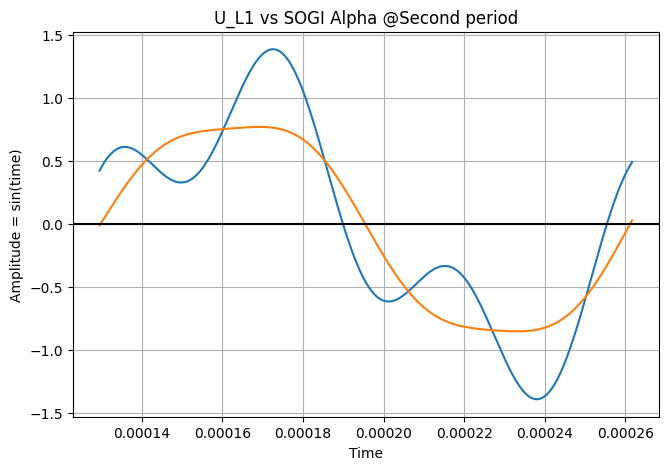

In [2]:

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_aspect(15/480000)
#960 samples per period Fs=48Khz Fc=50Hz
plt.plot(t[950:1920]/48000, u_l1[950:1920], t[950:1920]/48000, u_l1_alpha[950:1920])
plt.title('U_L1 vs SOGI Alpha @Second period')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

# Conclusion U_L1 fundamental is in sync with SOGI Alpha

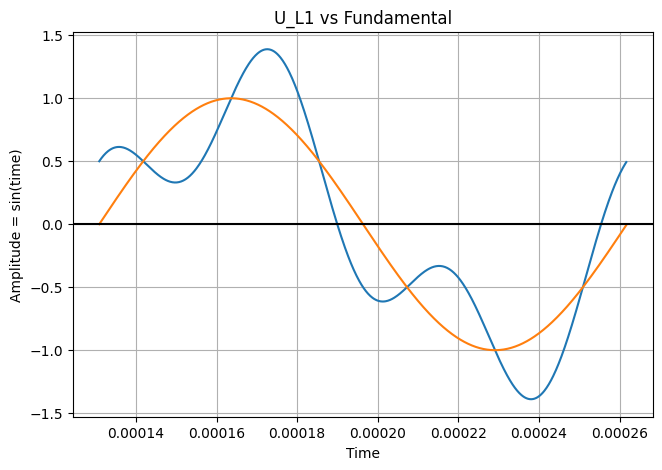

In [3]:
u_fundamental       = np.sin(t)
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_aspect(15/480000)
plt.plot(t[960:1920]/48000, u_l1[960:1920], t[960:1920]/48000, u_fundamental[960:1920])
plt.title('U_L1 vs Fundamental')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

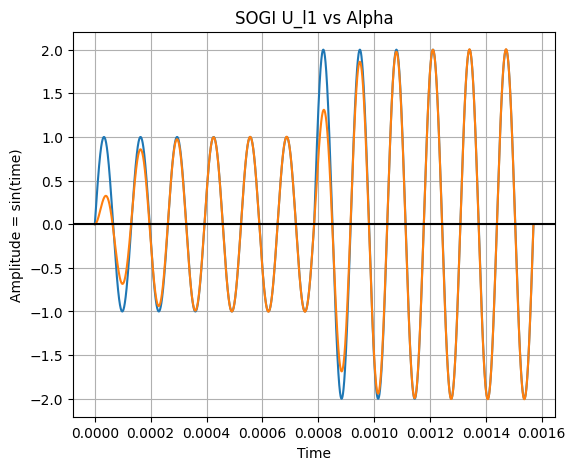

In [9]:
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_aspect(15/48000)
plt.plot(t/48000, u_l1, t/48000, u_l1_alpha)#t,u_l1_beta+0.05)
plt.title('SOGI U_l1 vs Alpha')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

h2= 
             -s + 1
--------------------------------
0.4167 s^3 - 1.333 s^2 + 1.917 s

########################################
#  SOGI integrator transfer function   #
#  Warning this is running in S-domain #
########################################


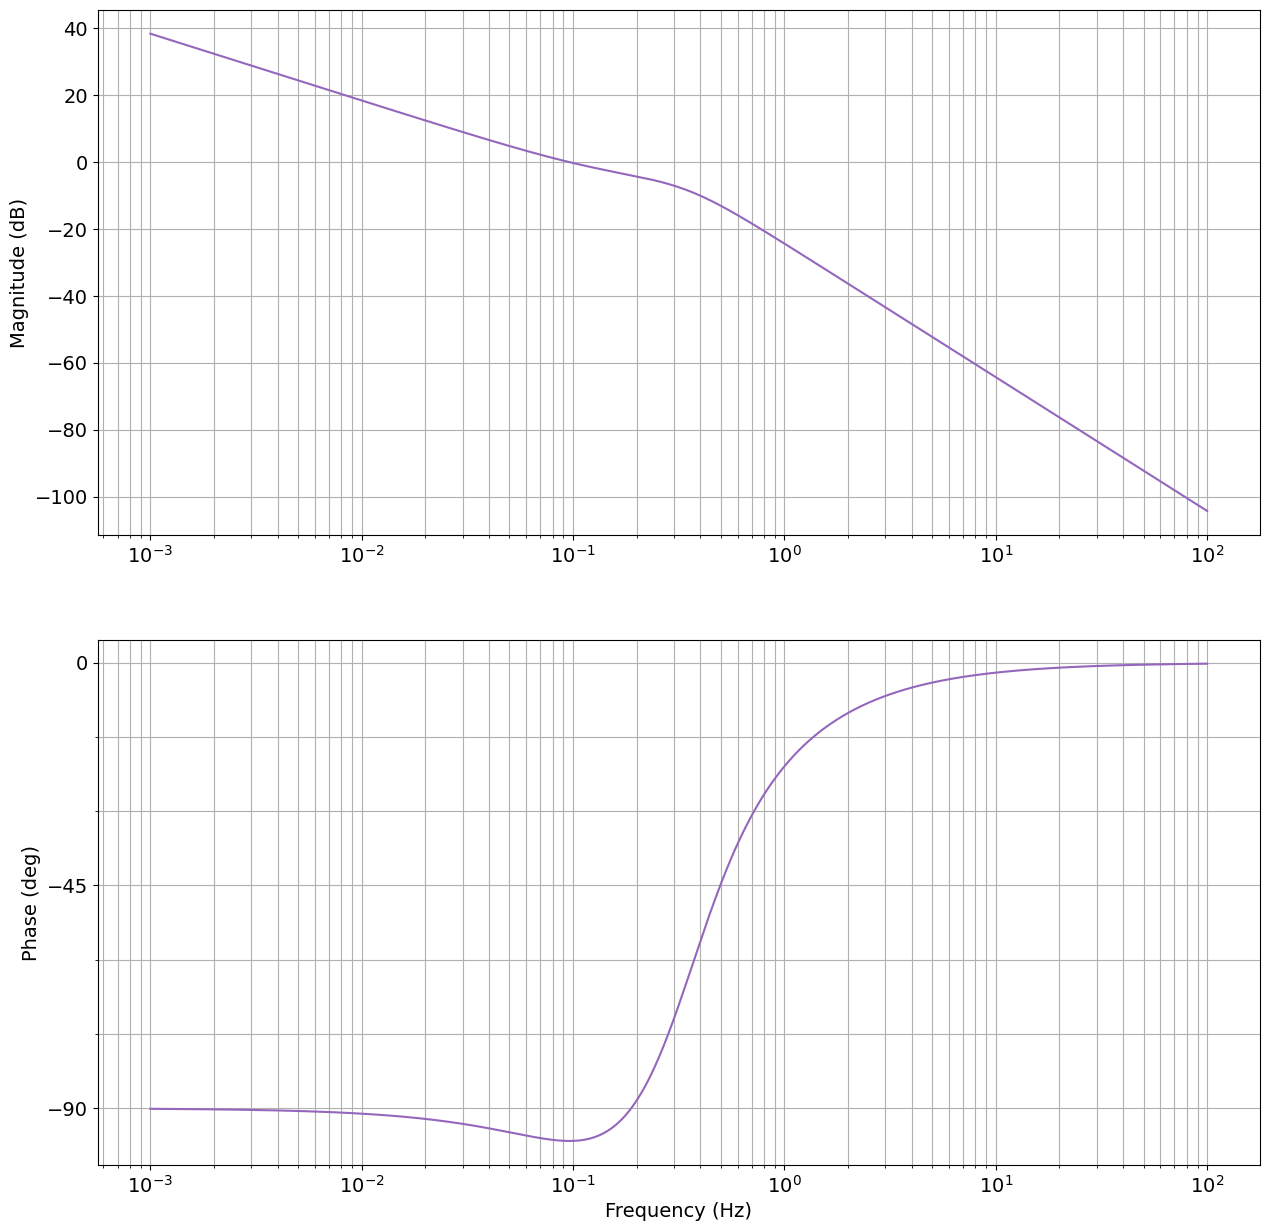

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import control

Fs=48000
dT=1/Fs

plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = 15.0,15.0
f = np.logspace(-3,2,1000)
f.min()
f.max()
len(f)
w = 2*np.pi*f

s = control.TransferFunction.s



den=[5/12.0, -16/12.0, 23/12, 0]
num=[0     , 0       , -1   , 1]
#h1=signal.TransferFunction(num, den,dT)
h2=H = control.tf(num , den)
#print ('h1=',h1)
print ('h2=',h2)
print ('########################################')
print ('#  SOGI integrator transfer function   #')
print ('#  Warning this is running in S-domain #')
print ('########################################')

bodeIIRReversed = control.bode(h2, w, dB=1,Hz=1,color ='tab:purple')


h2= 
0.4167 z^3 - 1.333 z^2 + 1.917 z
--------------------------------
             -z + 1

dt = 2.0833333333333333e-05

##################################################
#  SOGI integrator transfer function - z version #
#  Fs= 48000.0 Hz 
##################################################


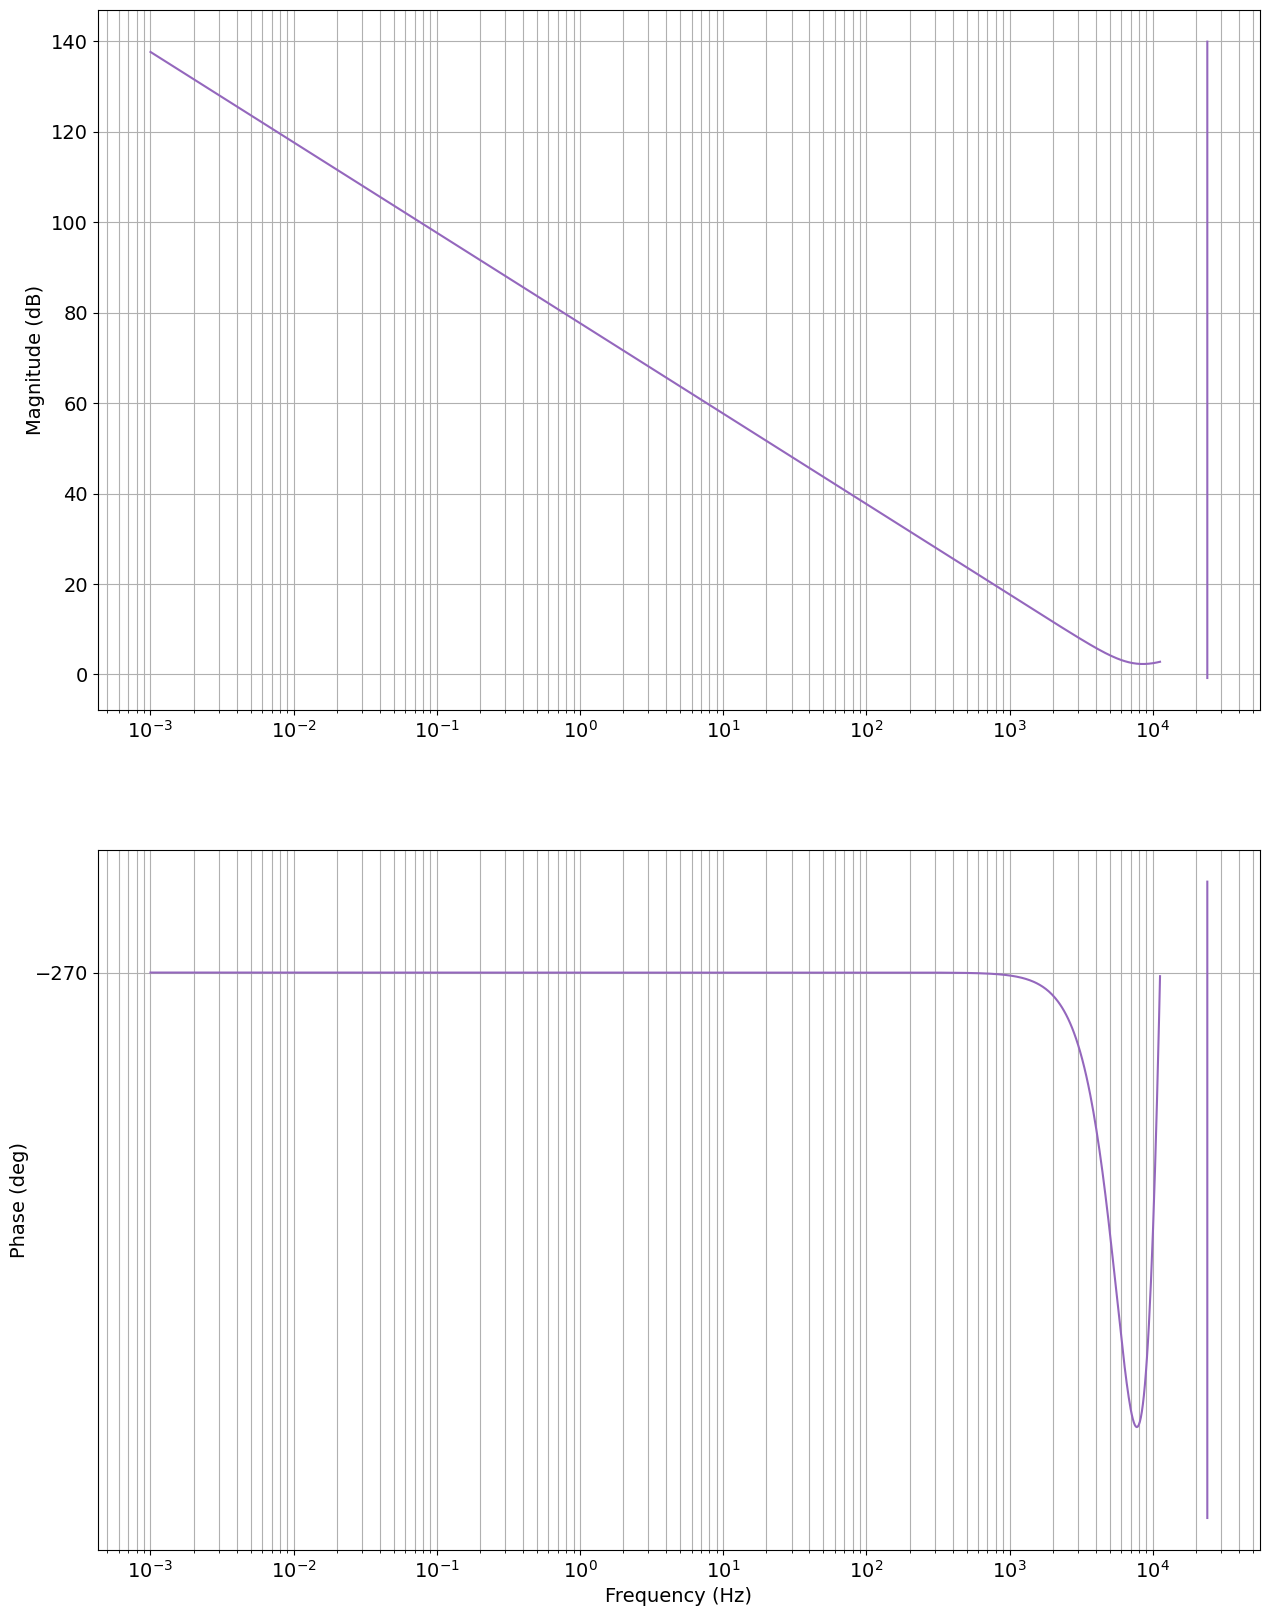

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import control

Fs=48000.0
dT=1/Fs

plt.rcParams['font.size'] = 14
plt.rcParams["figure.figsize"] = 15.0,20.0
f = np.logspace(-3,4.05,1000) #4.37
f.min()
f.max()
len(f)
w = 2*np.pi*f

s = control.TransferFunction.s



num=[5/12.0, -16/12.0, 23/12, 0]
den=[0     , 0       , -1   , 1]
#h1=signal.TransferFunction(num, den,dT)
h2=H = control.tf(num , den,dt=dT)
#print ('h1=',h1)
print ('h2=',h2)
print ('##################################################')
print ('#  SOGI integrator transfer function - z version #')
print ('#  Fs=',Fs,'Hz ')
print ('##################################################')

bodeIIRReversed = control.bode(h2, w, dB=1,Hz=1,color ='tab:purple')
